![Netflix Logo](https://upload.wikimedia.org/wikipedia/commons/6/69/Netflix_logo.svg)

# Purpose
This notebook explores the Netflix Movies and TV Shows dataset using:

- **pandas** for data manipulation  
- **numpy** for numerical operations  
- **matplotlib** for visualizations  

My aim is to understand the dataset, clean it, and extract unique business insights regarding Netflix's content. 

## Importing Essential Tools

In [1]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
from matplotlib import colors as mcolors

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/netflix-shows/netflix_titles.csv


## Dataset Preparation


In [2]:
df = pd.read_csv(r'/kaggle/input/netflix-shows/netflix_titles.csv')
df.head()
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

### Understanding The Dataset:

The columns in this dataset provide valuable insights into Netflix's business strategies to maintain its dominance in the OTT streaming space. However, the dataset contains missing values, primarily in the director and cast columns. Therefore, data cleaning is essential before proceeding with the analysis.

## Approach For Handling Missing Data

- To maximize the dataset's usability for generating business insights while identifying trends even among incomplete data, I will handle missing values as follows:
  - Replace missing values in the `director` and `cast` columns with descriptive placeholders like 'No Data' for easier grouping and analysis.
  - Replace missing values in the `country` column with the mode (most frequently occurring value) to maintain consistency.
  - Drop rows with missing values in critical columns such as 'date_added', 'rating', and 'duration', as their number is minimal and would not significantly affect the dataset's overall integrity.

In [3]:
df['director'].replace(np.nan , 'No Data', inplace = True)
df['cast'].replace(np.nan, 'No Data', inplace = True)

df['country'] = df['country'].fillna(df['country'].mode()[0])

df.dropna(inplace = True)

# Dropping duplicate tuples

df.drop_duplicates(inplace = True)

# Verifying the cleaned data

df.isnull().sum()

<ipython-input-3-e596164e9606>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['director'].replace(np.nan , 'No Data', inplace = True)
<ipython-input-3-e596164e9606>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

## Deriving New Features For Better Insights
Extracting relevant features like year_added and month_added to enhance the analysis of content trends on a yearly and monthly basis.

In [4]:
df['date_added'] = pd.to_datetime(df['date_added'], format = 'mixed')
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,9
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,9
3,s4,TV Show,Jailbirds New Orleans,No Data,No Data,United States,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,9
4,s5,TV Show,Kota Factory,No Data,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,9


## Comparison Of Netflix Content Type
Netflix predominantly invests in producing movies rather than TV shows. While TV shows have the potential to drive long-term subscriptions by keeping audiences engaged over multiple seasons, the preference for movies could indicate a strategic focus on shorter content consumption cycles. This may be influenced by factors such as viewer attention spans, production costs, and profitability per title. Further analysis of content trends over time and across regions can provide deeper insights into Netflix’s evolving content strategy.

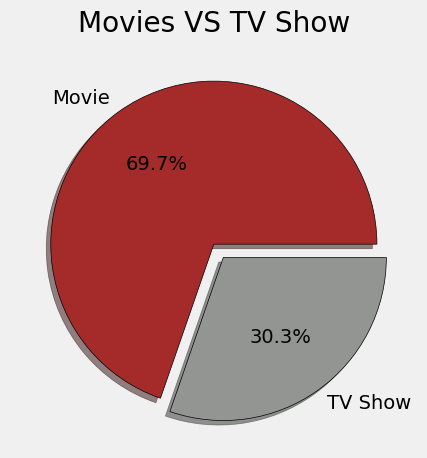

In [5]:
content_type = df['type'].value_counts()

plt.style.use('fivethirtyeight')

plt.pie(content_type, labels = content_type.index, explode = [0 , 0.1], shadow = True, autopct = "%1.1f%%", 
        wedgeprops = {'edgecolor' : 'black'}, colors = ['#A52A2A', '#929591'])

plt.title("Movies VS TV Show")

plt.tight_layout()
plt.show()

## Evolution Of Netflix's Content Over The Years
- The line plots illustrate a clear upward trend in the volume of content published by Netflix over the years.  
  - The most significant surge occurred between 2016 and 2019 for both movies and TV shows, indicating a period of aggressive expansion.  

- Movies have consistently outnumbered TV shows in annual releases.  
  - This dominance suggests that movies played a crucial role in Netflix’s rapid market growth.  

- Since 2019, there has been a noticeable decline in the number of movies released, while the decrease in TV show releases has been comparatively smaller.  
  - This trend may indicate a strategic shift in Netflix’s content strategy, potentially focusing on a higher proportion of TV shows in its annual output.  


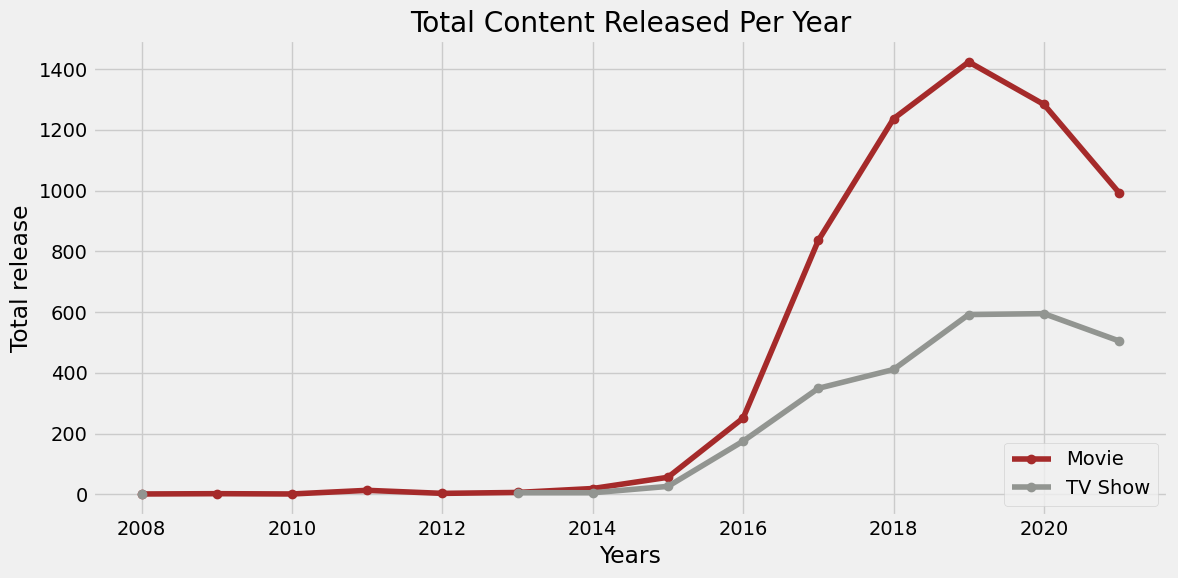

In [6]:
content_trend = df.groupby(['year_added', 'type']).size().unstack()

plt.style.use('fivethirtyeight')
plt.figure(figsize=(12, 6))

plt.plot(content_trend.index, content_trend['Movie'], marker = 'o', label = 'Movie', color = '#A52A2A')
plt.plot(content_trend.index, content_trend['TV Show'], marker = 'o', label = 'TV Show', color = '#929591')  

plt.xlabel('Years')
plt.ylabel('Total release')
plt.title('Total Content Released Per Year')
plt.legend(loc = 'lower right')

plt.tight_layout()
plt.show()

## Comparison of Content Types Across Countries 
- The grouped bar chart highlights that the United States and India contribute significantly to Netflix's content library, suggesting a strong subscriber base in these regions.  
- Content preferences vary across countries, indicating regional differences in viewing habits.  
- Netflix USA and India feature a higher number of movies compared to TV shows, whereas in countries like Japan and South Korea, TV shows dominate over movies.  
  - This trend may reflect differences in content production and consumer demand across regions.  
  - It could indicate that serialized storytelling is more prevalent in countries like Japan and South Korea.  
  - Further analysis of audience engagement metrics would be needed to understand these trends in detail.  

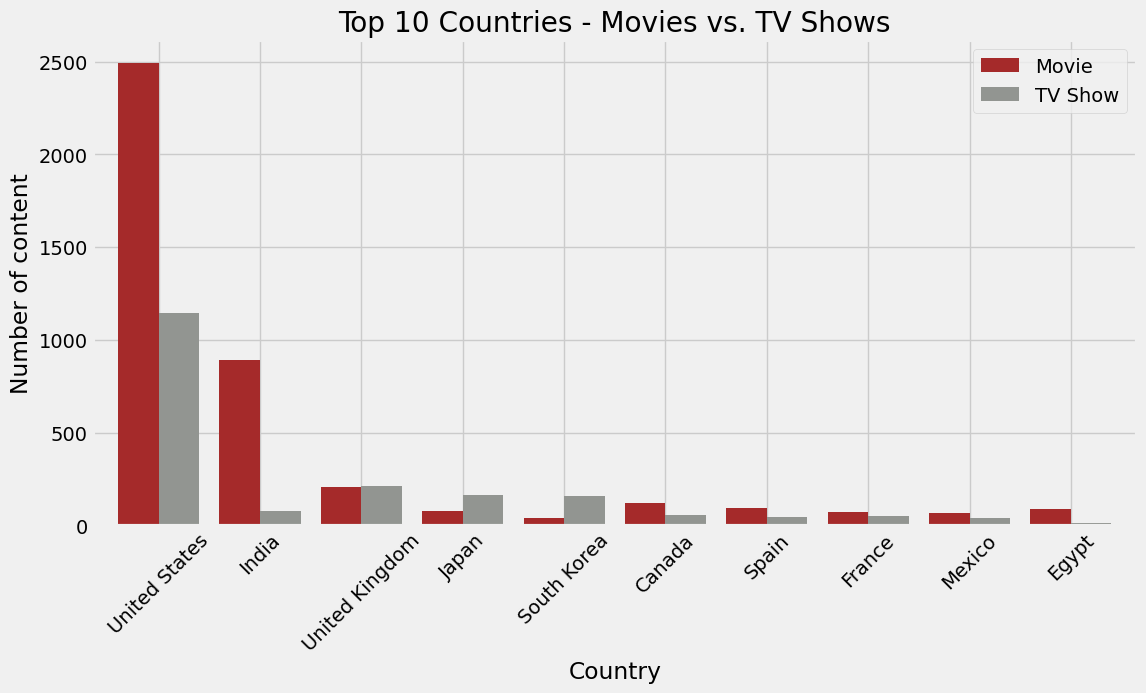

In [7]:
country_content = df.groupby(['country', 'type']).size().unstack()

top_countries = country_content.sum(axis=1).nlargest(10).index
country_content = country_content.loc[top_countries]

country_content.plot(kind='bar', width=0.8, figsize=(12,6), color=['#A52A2A', '#929591'])

plt.xlabel("Country")
plt.ylabel("Number of content")
plt.title("Top 10 Countries - Movies vs. TV Shows")
plt.xticks(rotation=45)
plt.legend()
plt.show()

## Top Directors On Netflix
The scatter plot provides a comparison of the top 10 directors on Netflix based on the number of shows they have released.  

### Key Insights:  
- The majority of top directors primarily focus on movies.  
- The color bar indicates that most top-ranking directors have more movie releases than TV shows.  
- Marcus Raboy stands out as the only director with more TV show releases than movies.  


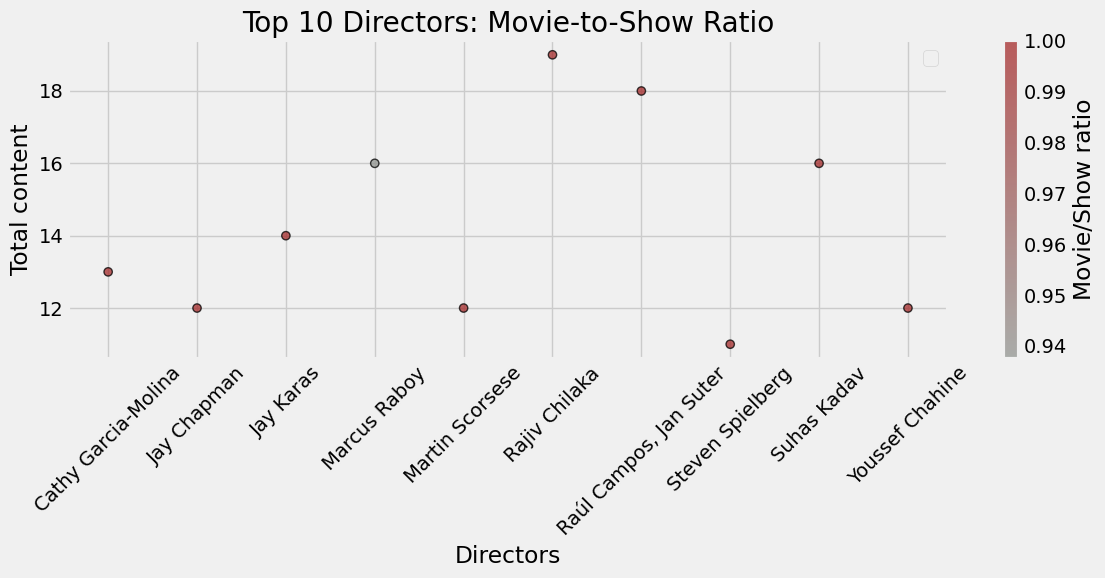

In [8]:
top_directors = df.loc[df['director'] != "No Data", 'director'].value_counts().head(10).index

directed_content = df[df['director'].isin(top_directors)].groupby(['director', 'type']).size().unstack(fill_value = 0)
directed_content['total_content'] = directed_content.sum(axis = 1)
directed_content['movie_ratio'] = directed_content['Movie'] / directed_content['total_content']

custom_cmap = mcolors.LinearSegmentedColormap.from_list("custom_cmap", ['#929591', '#A52A2A'])
plt.figure(figsize=(12, 6))

plt.scatter(directed_content.index, directed_content['total_content'], c = directed_content['movie_ratio'],
            cmap = custom_cmap, edgecolor = 'black', linewidth = 1, alpha = 0.75)

cbar = plt.colorbar()
cbar.set_label('Movie/Show ratio') 

plt.xlabel('Directors')
plt.xticks(rotation=45)
plt.ylabel('Total content')
plt.title('Top 10 Directors: Movie-to-Show Ratio')

plt.legend()
plt.tight_layout()
plt.show()